In [1]:
from IPython.display import Latex

from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

pp = PdfPages('multipage.pdf')

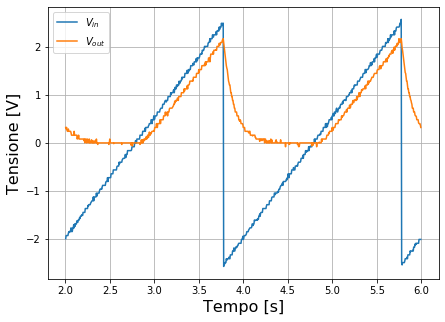

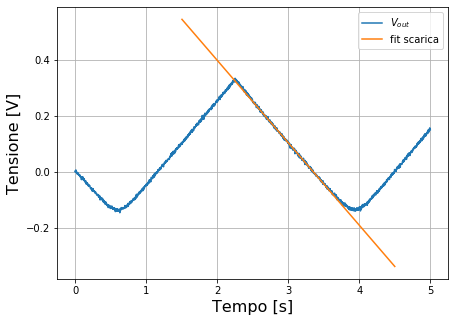

<IPython.core.display.Latex object>

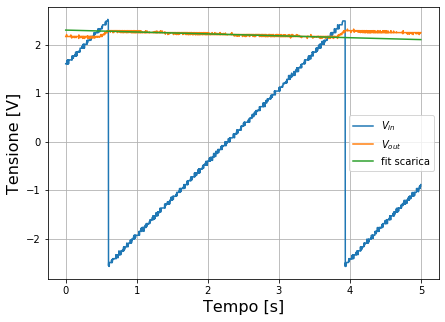

<IPython.core.display.Latex object>

In [2]:
plt.rcParams['figure.figsize'] = (7,5)
df = pd.read_csv('data/scope_0.csv', skiprows=1)
df['second'] = df.second + 6
plt.plot(df[df.second > 2].second, df[df.second > 2].Volt1, label='$V_{in}$')
plt.plot(df[df.second > 2].second, df[df.second > 2].Volt2, label='$V_{out}$')
plt.xlabel('Tempo [s]', fontsize=16)
plt.ylabel('Tensione [V]', fontsize=16)
plt.grid()
plt.legend()
pp.savefig()
plt.show()

df = pd.read_csv('data/scope_1.csv', skiprows=1)
df['second'] = df.second + 5
# fitting linear discharge
fit_int = (df.second < 3.5) & (df.second > 2.5)  
fit_x = df[fit_int].second.values
fit_y = df[fit_int].Volt.values
fit_f = lambda t, V_0, alpha: V_0 + alpha*t
popt, pcov = curve_fit(fit_f, fit_x, fit_y)
perr = np.sqrt(np.diag(pcov))

plt.plot(df.second, df.Volt, label='$V_{out}$')
plot_int = (df.second < 4.5) & (df.second > 1.5) 
plt.plot(df[plot_int].second, fit_f(df[plot_int].second, *popt), ms=7, label='fit scarica')
plt.xlabel('Tempo [s]', fontsize=16)
plt.ylabel('Tensione [V]', fontsize=16)
plt.grid()
plt.legend()
pp.savefig()
plt.show()

display(Latex(f'$\\alpha = {popt[1]:.4f} \pm {perr[1]:.4f}$'))

df = pd.read_csv('data/scope_2.csv', skiprows=1)
df['second'] = df.second + 5
# fitting linear discharge
fit_int = (df.second < 3.5) & (df.second > 1)  
fit_x = df[fit_int].second.values
fit_y = df[fit_int].Volt2.values
fit_f = lambda t, V_0, alpha: V_0 + alpha*t
popt, pcov = curve_fit(fit_f, fit_x, fit_y)
perr = np.sqrt(np.diag(pcov))

plt.plot(df.second, df.Volt1, label='$V_{in}$')
plt.plot(df.second, df.Volt2, label='$V_{out}$')
plt.plot(df.second, fit_f(df.second, *popt), ms=7, label='fit scarica')
plt.xlabel('Tempo [s]', fontsize=16)
plt.ylabel('Tensione [V]', fontsize=16)
plt.grid()
plt.legend()
pp.savefig()
plt.show()

display(Latex(f'$\\alpha = {popt[1]:.4f} \pm {perr[1]:.4f}$'))

In [3]:
pp.close()